In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('datasets/Minimum Wage Data.csv',encoding ="latin")
unemp_counties = pd.read_csv("datasets/output.csv")
unemp_counties = unemp_counties.replace(0,np.NaN).dropna(axis=0)
unemp_counties.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 2862 non-null   int64  
 1   State                                                2862 non-null   object 
 2   State.Minimum.Wage                                   2862 non-null   float64
 3   State.Minimum.Wage.2020.Dollars                      2862 non-null   float64
 4   Federal.Minimum.Wage                                 2862 non-null   float64
 5   Federal.Minimum.Wage.2020.Dollars                    2862 non-null   float64
 6   Effective.Minimum.Wage                               2862 non-null   float64
 7   Effective.Minimum.Wage.2020.Dollars                  2862 non-null   float64
 8   CPI.Average                                          2862 non-null  

In [3]:
gb = df.groupby("State")
gb.get_group("Alabama").set_index("Year").head()

,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
Year,,,,,,,,,,,,,,
1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
1969,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
1970,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
1971,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
1972,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [4]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["State.Minimum.Wage"]].rename(columns={"State.Minimum.Wage":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["State.Minimum.Wage"]].rename(columns={"State.Minimum.Wage":name}))
        
act_min_wage

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,2.10,0.468,0.15625,1.65,1.00,1.40,1.25,1.25,0.00,...,0.0,0.00,0.00,1.00,1.40,0.00,1.60,1.00,1.25,1.20
1969,0.0,2.10,0.468,0.15625,1.65,1.00,1.40,1.25,1.25,0.00,...,0.0,0.00,0.00,1.00,1.40,0.00,1.60,1.00,1.25,1.20
1970,0.0,2.10,0.468,1.10000,1.65,1.00,1.60,1.25,1.60,0.00,...,0.0,0.00,0.00,1.00,1.60,0.00,1.60,1.00,1.30,1.30
1971,0.0,2.10,0.468,1.10000,1.65,1.00,1.60,1.25,1.60,0.00,...,0.0,0.00,0.00,1.00,1.60,0.00,1.60,1.00,1.30,1.30
1972,0.0,2.10,0.468,1.20000,1.65,1.00,1.85,1.60,1.60,0.00,...,0.0,1.40,0.00,1.20,1.60,0.00,1.60,1.20,1.45,1.50
1973,0.0,2.10,0.468,1.20000,1.65,1.00,1.85,1.60,1.60,0.00,...,0.0,1.40,0.00,1.20,1.60,0.00,1.60,1.20,1.45,1.50
1974,0.0,2.10,0.468,1.20000,1.65,1.00,1.85,1.60,1.60,0.00,...,0.0,1.40,0.00,1.20,1.60,0.00,1.60,1.20,1.45,1.50
1975,0.0,2.10,0.468,1.20000,1.65,1.00,1.85,1.60,1.60,0.00,...,0.0,1.40,0.00,1.20,1.60,0.00,1.60,1.20,1.45,1.50
1976,0.0,2.80,0.000,1.90000,2.00,1.00,2.21,2.00,2.25,0.00,...,0.0,1.40,0.00,1.55,2.30,2.00,2.20,2.00,2.10,1.60


In [5]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.0,5.274906,2.324415,4.193632,5.175472,4.253019,5.194906,4.489623,5.250189,2.160943,...,0.0,3.629245,3.472642,4.083962,5.140377,3.930189,5.186415,4.333019,4.355660,2.838679
std,0.0,2.424435,3.866388,2.374197,2.985101,3.041658,2.809161,2.539010,3.462850,3.490073,...,0.0,2.421209,2.225369,2.208850,2.829715,2.424105,3.414871,2.423502,2.041697,1.746800
min,0.0,2.100000,0.000000,0.156250,1.650000,1.000000,1.400000,1.250000,1.250000,0.000000,...,0.0,0.000000,0.000000,1.000000,1.400000,0.000000,1.600000,1.000000,1.250000,1.200000
25%,0.0,3.850000,0.000000,2.700000,3.350000,1.900000,3.370000,2.000000,2.500000,0.000000,...,0.0,1.400000,3.350000,2.500000,3.350000,2.650000,2.300000,2.750000,3.250000,1.600000
50%,0.0,4.750000,0.000000,4.250000,4.250000,3.000000,4.270000,4.250000,4.250000,0.000000,...,0.0,3.350000,4.300000,4.250000,4.250000,4.250000,4.250000,4.250000,4.250000,1.600000
75%,0.0,7.150000,6.750000,6.250000,7.500000,6.850000,7.650000,6.650000,7.000000,6.670000,...,0.0,5.150000,4.300000,5.150000,7.530000,5.150000,7.930000,5.850000,6.500000,5.150000
max,0.0,10.190000,12.000000,10.000000,13.000000,12.000000,11.000000,9.250000,14.000000,8.560000,...,0.0,7.250000,10.500000,7.250000,10.960000,7.250000,13.500000,8.750000,7.250000,5.150000


In [6]:
act_min_wage.corr()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.813187,0.981938,0.986455,0.970585,0.992234,0.971193,0.973326,0.834101,...,NaN,0.948283,0.781511,0.961031,0.992841,0.953998,0.974007,0.984063,0.966210,0.876241
Arizona,NaN,0.813187,1.000000,0.805781,0.853713,0.878803,0.827466,0.786208,0.860865,0.952754,...,NaN,0.806554,0.524404,0.761328,0.840408,0.724143,0.853009,0.835118,0.776753,0.770526
Arkansas,NaN,0.981938,0.805781,1.000000,0.981222,0.974544,0.980991,0.971062,0.976168,0.805780,...,NaN,0.935556,0.826498,0.954685,0.982433,0.953048,0.965271,0.983518,0.961117,0.816334
California,NaN,0.986455,0.853713,0.981222,1.000000,0.987726,0.992328,0.969744,0.982806,0.853217,...,NaN,0.939076,0.793820,0.946546,0.992023,0.931147,0.987628,0.977868,0.950854,0.873317
Colorado,NaN,0.970585,0.878803,0.974544,0.987726,1.000000,0.980025,0.968148,0.986274,0.866409,...,NaN,0.936459,0.776859,0.940727,0.982147,0.919247,0.982347,0.972318,0.943689,0.845495
Connecticut,NaN,0.992234,0.827466,0.980991,0.992328,0.980025,1.000000,0.981611,0.972706,0.850481,...,NaN,0.961566,0.773385,0.964255,0.997531,0.952319,0.984275,0.986163,0.971129,0.894385
Delaware,NaN,0.971193,0.786208,0.971062,0.969744,0.968148,0.981611,1.000000,0.960952,0.812430,...,NaN,0.969046,0.758869,0.975637,0.979677,0.954767,0.976362,0.979082,0.966449,0.865850
District of Columbia,NaN,0.973326,0.860865,0.976168,0.982806,0.986274,0.972706,0.960952,1.000000,0.849547,...,NaN,0.924320,0.760826,0.930119,0.977237,0.911857,0.978338,0.969244,0.925777,0.824188
Florida,NaN,0.834101,0.952754,0.805780,0.853217,0.866409,0.850481,0.812430,0.849547,1.000000,...,NaN,0.848148,0.497443,0.799775,0.862605,0.768790,0.857463,0.852310,0.826012,0.835023


In [7]:
import numpy as np
act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head(5)

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,0.981938,0.986455,0.970585,0.992234,0.971193,0.973326,0.979386,0.986835,0.958666,...,0.989706,0.959445,0.991785,0.980783,0.961031,0.992841,0.974007,0.984063,0.966210,0.876241
Arkansas,0.981938,1.000000,0.981222,0.974544,0.980991,0.971062,0.976168,0.975847,0.989265,0.951022,...,0.982317,0.957945,0.986417,0.984424,0.954685,0.982433,0.965271,0.983518,0.961117,0.816334
California,0.986455,0.981222,1.000000,0.987726,0.992328,0.969744,0.982806,0.967800,0.981436,0.946857,...,0.985984,0.946763,0.989798,0.974206,0.946546,0.992023,0.987628,0.977868,0.950854,0.873317
Colorado,0.970585,0.974544,0.987726,1.000000,0.980025,0.968148,0.986274,0.961301,0.973284,0.942145,...,0.977187,0.939117,0.980496,0.970238,0.940727,0.982147,0.982347,0.972318,0.943689,0.845495
Connecticut,0.992234,0.980991,0.992328,0.980025,1.000000,0.981611,0.972706,0.976996,0.984969,0.963695,...,0.993275,0.965274,0.994482,0.979789,0.964255,0.997531,0.984275,0.986163,0.971129,0.894385


In [8]:
min_wage_corr=act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

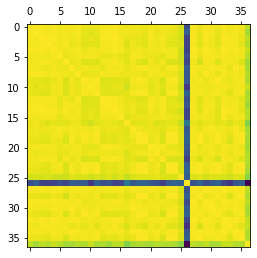

In [9]:
import matplotlib.pyplot as plt
plt.matshow(min_wage_corr)

In [10]:
min_wage_corr.columns

Index(['Alaska', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Guam', 'Hawaii', 'Idaho',
       'Indiana', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota',
       'Utah', 'Vermont', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

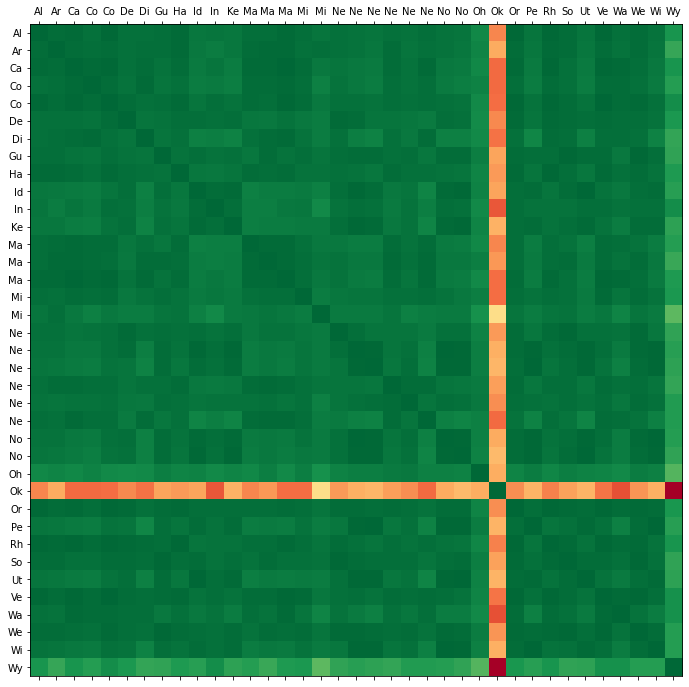

In [11]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

In [12]:
state_abbreviation = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')

In [13]:
state_abbv = state_abbreviation[0]
state_abbv

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [14]:
state_abbv.to_csv("datasets/state_abbv.csv", index = False)
state_abbv = pd.read_csv("datasets/state_abb.csv", index_col=0)
state_abbv

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA
Colorado,Colo.,CO
Connecticut,Conn.,CT
Delaware,Del.,DE
District of Columbia,D.C.,DC


In [15]:
abbv_dict = state_abbv[["Postal Code"]].to_dict()
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [19]:
abbv_dict = [abbv_dict[c] for c in min_wage_corr.columns]


KeyError: 'Guam'

In [20]:
abbv_dict['Guam']='GU'

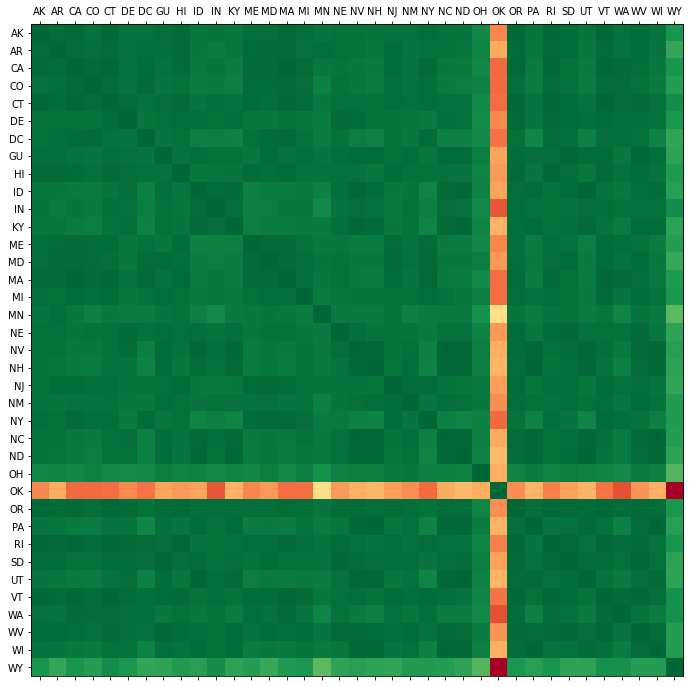

In [21]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()

In [22]:
def get_min_wage(year, state):
    try:
        return act_min_wage.loc[year][state]
    except:        
        return np.NaN
get_min_wage(2012,"Colorado")

7.64

In [25]:
%%time

unemp_counties['min_wage']= list(map(get_min_wage,unemp_counties['Year'],unemp_counties['State']))

Wall time: 3min 3s


In [26]:
unemp_counties.tail()

,Year,Month,State,County,Rate,min_wage
885543,2009,November,Maine,Somerset County,10.5,7.25
885544,2009,November,Maine,Oxford County,10.5,7.25
885545,2009,November,Maine,Knox County,7.5,7.25
885546,2009,November,Maine,Piscataquis County,11.3,7.25
885547,2009,November,Maine,Aroostook County,9.0,7.25


In [27]:
unemp_counties[['Rate','min_wage']].corr()

,Rate,min_wage
Rate,1.000000,-0.043484
min_wage,-0.043484,1.000000


In [28]:
unemp_counties[['Rate','min_wage']].cov()

,Rate,min_wage
Rate,9.687327,-0.315996
min_wage,-0.315996,5.451221


In [29]:
act_min_wage.loc[1968]['Alabama']

0.0

In [51]:
pres16 = pd.read_csv("datasets/pres16results.csv")
pres16.head()


,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [83]:
county_2015 = unemp_counties.copy()[(unemp_counties['Year']==2015)&(unemp_counties['Month']=='February')]

In [84]:
state_abbv = pd.read_csv('datasets/state_abbv.csv',index_col =0)
state_abbv = state_abbv[['Postal Code']]
state_abbv.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [85]:
state_abbv_dict = state_abbv.to_dict()['Postal Code']

In [86]:
state_abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [87]:
county_2015['State']=county_2015['State'].map(state_abbv_dict)

In [88]:
county_2015.tail()

,Year,Month,State,County,Rate,min_wage
2797,2015,February,ME,Somerset County,8.4,7.5
2798,2015,February,ME,Oxford County,6.8,7.5
2799,2015,February,ME,Knox County,6.1,7.5
2800,2015,February,ME,Piscataquis County,7.0,7.5
2801,2015,February,ME,Aroostook County,7.2,7.5


In [89]:
pres16.rename(columns={'county':"County",'st':'State'}, inplace = True)

In [90]:
pres16.head()

fips             cand  pct_report       votes  total_votes  \
County State                                                              
NaN    US      US     Donald Trump      0.9951  60350241.0  127592176.0   
       US      US  Hillary Clinton      0.9951  60981118.0  127592176.0   
       US      US     Gary Johnson      0.9951   4164589.0  127592176.0   
       US      US       Jill Stein      0.9951   1255968.0  127592176.0   
       US      US    Evan McMullin      0.9951    451636.0  127592176.0   

                   pct          lead  
County State                          
NaN    US     0.472993  Donald Trump  
       US     0.477938  Donald Trump  
       US     0.032640  Donald Trump  
       US     0.009844  Donald Trump  
       US     0.003540  Donald Trump

In [91]:
pres16.set_index(["County","State"], inplace = True)

KeyError: "None of ['County', 'State'] are in the columns"

In [93]:
county_2015.set_index(["County","State"], inplace = True)

KeyError: "None of ['County', 'State'] are in the columns"

In [95]:
 county_2015.head()

,,Year,Month,Rate,min_wage
County,State,,,,
Newton County,MS,2015,February,6.1,0.0
Panola County,MS,2015,February,9.4,0.0
Monroe County,MS,2015,February,7.9,0.0
Hinds County,MS,2015,February,6.1,0.0
Kemper County,MS,2015,February,10.6,0.0


In [97]:
pres16.head()


fips             cand  pct_report       votes  total_votes  \
County State                                                              
NaN    US      US     Donald Trump      0.9951  60350241.0  127592176.0   
       US      US  Hillary Clinton      0.9951  60981118.0  127592176.0   
       US      US     Gary Johnson      0.9951   4164589.0  127592176.0   
       US      US       Jill Stein      0.9951   1255968.0  127592176.0   
       US      US    Evan McMullin      0.9951    451636.0  127592176.0   

                   pct          lead  
County State                          
NaN    US     0.472993  Donald Trump  
       US     0.477938  Donald Trump  
       US     0.032640  Donald Trump  
       US     0.009844  Donald Trump  
       US     0.003540  Donald Trump

In [98]:
pres16 = pres16[pres16['cand']=='Donald Trump']
pres16 = pres16[['pct']]
pres16.dropna(inplace = True)
pres16.head()

pct
County State          
NaN    US     0.472993
       CA     0.330641
       FL     0.490640
       TX     0.525830
       NY     0.374752

In [101]:
all_together = county_2015.merge(pres16,on = ['County','State'])
all_together.dropna(inplace = True)